<a href="https://colab.research.google.com/github/Pentuhov/PR.AI-3/blob/main/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%94%D0%97_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

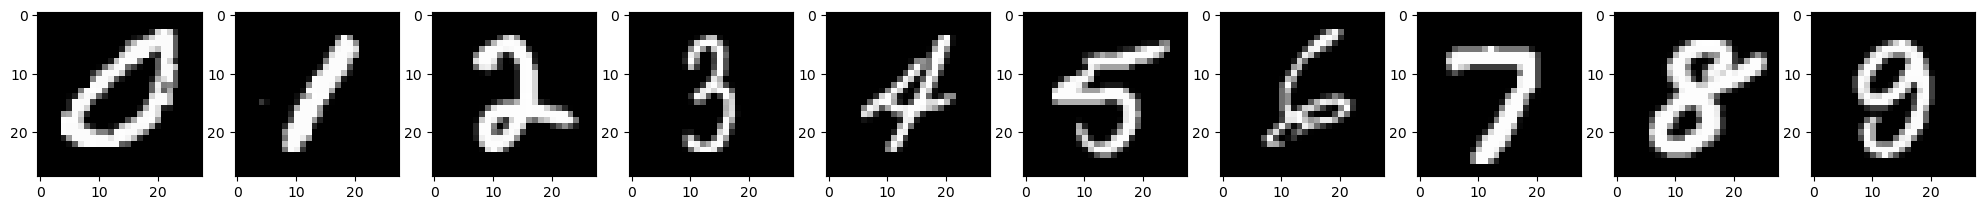

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
# Ваше решение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Загрузка и нормализация данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создание модели CNN
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))

In [ ]:
# Первый сверточный слой
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

In [ ]:
# Второй сверточный слой
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

In [ ]:
# Полносвязные слои
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128,
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8296 - loss: 0.5506 - val_accuracy: 0.7977 - val_loss: 0.6441
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9666 - loss: 0.1128 - val_accuracy: 0.9836 - val_loss: 0.0521
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9754 - loss: 0.0848 - val_accuracy: 0.9859 - val_loss: 0.0473
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9783 - loss: 0.0741 - val_accuracy: 0.9902 - val_loss: 0.0308
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9814 - loss: 0.0607 - val_accuracy: 0.9906 - val_loss: 0.0276
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9822 - loss: 0.0576 - val_accuracy: 0.9905 - val_loss: 0.0313
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9836 - loss: 0.0559 - val_accuracy: 0.9911 - val_loss: 0.0306
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9850 - loss: 0.0483 - 

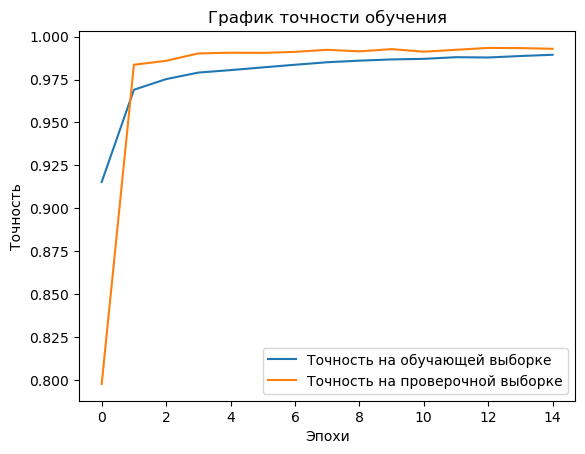

In [ ]:
# График обучения
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
plt.title('График точности обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()